In [1]:
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt  

In [2]:
import scipy.constants as cst
C_SI = cst.c
G_SI = cst.G

## Analytical developement

Seems consistent with values found in Wikipedia.

According to [Minazzoli & Hees, PRD, 88, 041504(R)] the potential in Entangled Relativity should read as follows

$$w=w_{\mathrm{GR}}- \frac{G_{\mathrm{eff}}}{c^{2}} \int \frac{P\left(\mathbf{x}^{\prime}\right) d^{3} x^{\prime}}{\left|\mathbf{x}-\mathbf{x}^{\prime}\right|}+\mathcal{O}\left(1 / c^{4}\right),$$

given that $\omega_0 = 0$. Assuming that the Earth is spherical, the integral above outside matter reads

$$\frac{1}{c^2}\int \frac{P\left(\mathbf{x}^{\prime}\right) d^{3} x^{\prime}}{\left|\mathbf{x}-\mathbf{x}^{\prime}\right|} = \frac{M^P}{r},$$

where

$$M^P \equiv 4 \pi \int \frac{r^2~P(r)}{c^2}  dr.$$

$M^P$ could be thought as the difference between the mass of the Earth when measured from gravitational redshift on the one hand, and from the orbital dynamics on the other hand. The mass of the Earth that would be derived from the dynamics of orbiting bodies, on the other hand, reads

$$M \equiv 4 \pi \int r^2~\rho(r)  dr,$$

where $\rho$ is the density.

## Case of the Sun

In [3]:
SUN_model = np.genfromtxt('Sun_profile', comments = '#') # Everything is in SI (https://users-phys.au.dk/jcd/solar_models/)

In [4]:
PSUN_center_bar = 2.477e11 # (bar) https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
rhoSUN_center = 1.622e5 # kg/m^3

barTOpascal = 1e5

PSUN_center = PSUN_center_bar * barTOpascal # pascal

print(f'For the sun, based on central values, the ratio is {PSUN_center / (rhoSUN_center*C_SI**2)}')

For the sun, based on central values, the ratio is 1.699157946266839e-06


In [5]:
SUN_radius = 695700*1e3 # m
# Density
Density_SUN = SUN_model[:,2] * 1e-3 / (1e-2)**3 # kg/m^3
# Pressure
Pressure_SUN = SUN_model[:,3] / 10 # pascal (bc, given in dyn/cm^2)
# Radius of the Sun
Radius_SUN =  SUN_model[:,0] * SUN_radius

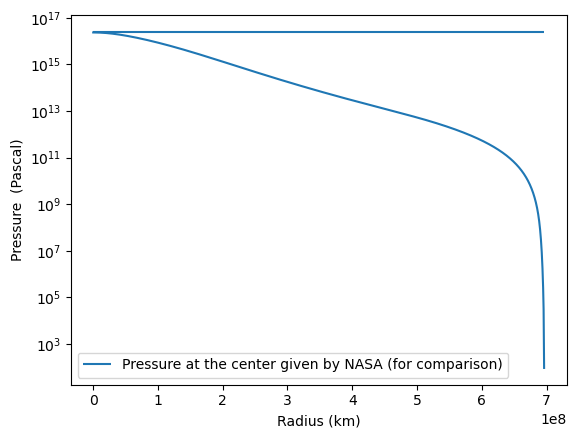

In [6]:
img, ax = plt.subplots()
ax.plot(Radius_SUN,Pressure_SUN) 
ax.hlines(y = PSUN_center, xmin = 0 , xmax = SUN_radius , label = 'Pressure at the center given by NASA (for comparison)')
ax.set_yscale('log')
plt.xlabel('Radius (km)')
plt.ylabel('Pressure  (Pascal)')
plt.legend()
plt.show()

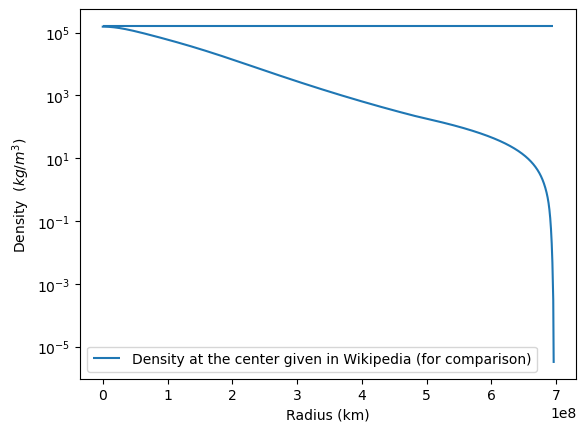

In [7]:
img, ax = plt.subplots()
ax.plot(Radius_SUN,Density_SUN) 
ax.hlines(y = rhoSUN_center, xmin = 0 , xmax = SUN_radius , label = 'Density at the center given in Wikipedia (for comparison)')
ax.set_yscale('log')
plt.xlabel('Radius (km)')
plt.ylabel('Density  ($kg/m^3$)')
plt.legend()
plt.show()

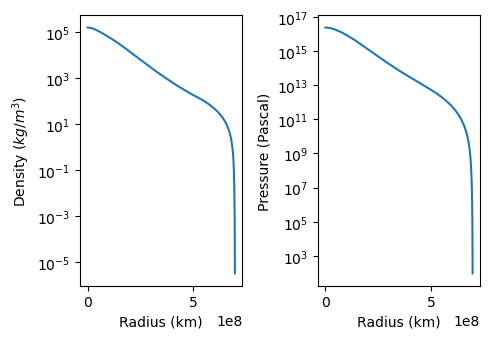

In [8]:
# Create two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3.5))

# Density plot
ax1.plot(Radius_SUN, Density_SUN)
# ax1.hlines(y=rhoSUN_center, xmin=0, xmax=SUN_radius, label='Density at the center (Wikipedia)')
ax1.set_yscale('log')
ax1.set_xlabel('Radius (km)')
ax1.set_ylabel('Density ($kg/m^3$)')
# ax1.legend()

# Pressure plot
ax2.plot(Radius_SUN, Pressure_SUN)
# ax2.hlines(y=PSUN_center, xmin=0, xmax=SUN_radius, label='Pressure at the center (NASA)')
ax2.set_yscale('log')
ax2.set_xlabel('Radius (km)')
ax2.set_ylabel('Pressure (Pascal)')
# ax2.legend()

plt.tight_layout()
plt.savefig("rhoP_sunv2.png")  # Save the figure
plt.show()


In [9]:
# Pressure over c^2
Poc2_SUN = Pressure_SUN / C_SI**2 

# r^2
R2_SUN = Radius_SUN * Radius_SUN

rhoR2_SUN = Density_SUN * R2_SUN
Poc2R2_SUN = Poc2_SUN * R2_SUN


M_SUN = 4 * np.pi * simps(rhoR2_SUN,-Radius_SUN)

MPoc_SUN = 4 * np.pi * simps(Poc2R2_SUN,-Radius_SUN)

In [10]:
print(f'Computed mass of the Sun = {M_SUN:.3e} kg, whereas Wikipidia gives M = 1.9891e30 kg')
print(f'Computed contribution of P to the mass of the Earth for gravitational redshift = {MPoc_SUN:.1e} kg')

print(f'Ratio between the two = {MPoc_SUN/M_SUN:.1e}')

Computed mass of the Sun = 1.987e+30 kg, whereas Wikipidia gives M = 1.9891e30 kg
Computed contribution of P to the mass of the Earth for gravitational redshift = 2.3e+24 kg
Ratio between the two = 1.1e-06


The variation of $\hbar$ in the potential of the Sun between the surface and an observer located on the Earth reads
$$\frac{\Delta \hbar}{\hbar} = \frac{G M^P_\Sun}{c^2}\left(\frac{1}{r_\Sun}-\frac{1}{r_\Earth} \right) \approx \frac{G M^P_\Sun}{r_\Sun c^2}$$

In [11]:
relative_delta_h = cst.G * MPoc_SUN / Radius_SUN[0] / C_SI**2
print(f'The variation of $\hbar$ in the potential of the Sun between the surface and an observer located on the Earth is {relative_delta_h:.1e}')

The variation of $\hbar$ in the potential of the Sun between the surface and an observer located on the Earth is 2.4e-12


<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_176929/3585398931.py:2: SyntaxWarning: invalid escape sequence '\h'
  print(f'The variation of $\hbar$ in the potential of the Sun between the surface and an observer located on the Earth is {relative_delta_h:.1e}')


## Case of the Earth

In [12]:
PREM_model = np.genfromtxt('densite_pression', comments = '#') # Everything is in SI
#Data provided by Yanick Ricard from the ENS Lyon, but is also available at https://ds.iris.edu/ds/products/emc-prem/

In [13]:
# Density
Density = PREM_model[:,1]
# Pressure
Pressure = PREM_model[:,2][-1]- PREM_model[:,2]
# Radius of the Earth
Radius_earth = PREM_model[:,0][-1]

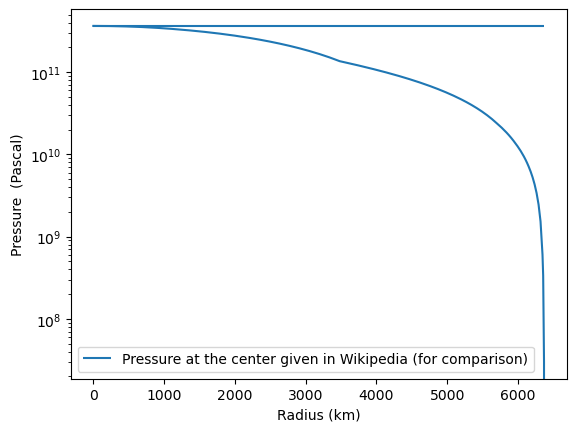

In [14]:
img, ax = plt.subplots()
ax.plot(PREM_model[:,0]/1e3,Pressure) 
ax.hlines(y = 360*1e9, xmin = 0 , xmax = Radius_earth /1e3 , label = 'Pressure at the center given in Wikipedia (for comparison)')
ax.set_yscale('log')
plt.xlabel('Radius (km)')
plt.ylabel('Pressure  (Pascal)')
plt.legend()
plt.show()

Seems consistent with values found in Wikipedia.

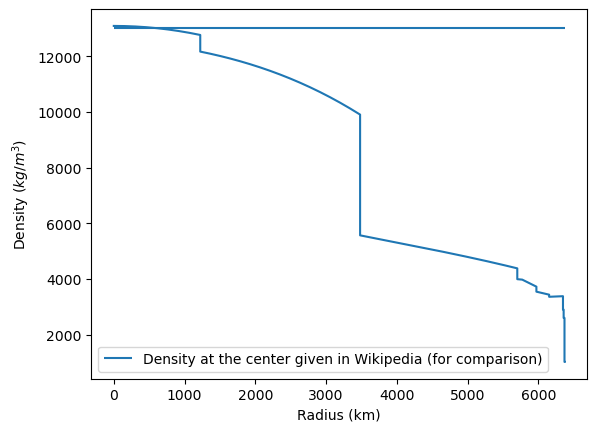

In [15]:
img, ax = plt.subplots()
plt.plot(PREM_model[:,0]/1e3,Density) 
ax.hlines(y = 13e3, xmin = 0 , xmax = Radius_earth /1e3 , label = 'Density at the center given in Wikipedia (for comparison)')
plt.xlabel('Radius (km)')
plt.ylabel('Density ($kg/m^3$)')
plt.legend()
plt.show()

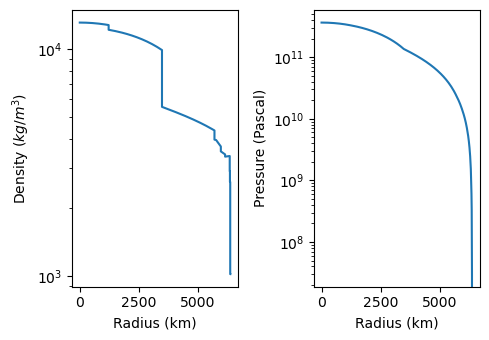

In [16]:
# Create two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3.5))

# Density plot
ax1.plot(PREM_model[:,0]/1e3,Density) 
# ax1.hlines(y=rhoSUN_center, xmin=0, xmax=SUN_radius, label='Density at the center (Wikipedia)')
ax1.set_yscale('log')
ax1.set_xlabel('Radius (km)')
ax1.set_ylabel('Density ($kg/m^3$)')
# ax1.legend()

# Pressure plot
ax2.plot(PREM_model[:,0]/1e3,Pressure) 
# ax2.hlines(y=PSUN_center, xmin=0, xmax=SUN_radius, label='Pressure at the center (NASA)')
ax2.set_yscale('log')
ax2.set_xlabel('Radius (km)')
ax2.set_ylabel('Pressure (Pascal)')
# ax2.legend()

plt.tight_layout()
plt.savefig("rhoP_earthv2.png")  # Save the figure
plt.show()

In [17]:
# Pressure over c^2
Poc2 = Pressure / C_SI**2 

# r^2
R2 = PREM_model[:,0] * PREM_model[:,0]

rhoR2 = Density * R2
Poc2R2 = Poc2 * R2

# Definition of dr in the integration
dr = PREM_model[:,0][1]-PREM_model[:,0][0]

M_earth = 4 * np.pi * simps(rhoR2, dx=dr)
MPoc_earth = 4 * np.pi * simps(Poc2R2, dx=dr)

In [18]:
print(f'Computed mass of the Earth = {M_earth:.1e} kg, whereas Wikipidia gives M = 5.9e+24 kg')
print(f'Computed contribution of P to the mass of the Earth for gravitational redshift = {MPoc_earth:.1e} kg')

print(f'Ratio between the two = {MPoc_earth/M_earth:.1e}')

Computed mass of the Earth = 6.3e+24 kg, whereas Wikipidia gives M = 5.9e+24 kg
Computed contribution of P to the mass of the Earth for gravitational redshift = 8.0e+14 kg
Ratio between the two = 1.3e-10
